In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis

In [2]:
data = pd.read_csv("./data/T9-12.DAT", sep="\s+", header=None,
            names=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])

data_standard = (data - data.mean()) / data.std()

In [3]:
from sklearn.decomposition import FactorAnalysis

fa2 = FactorAnalysis(n_components=2)
fa3 = FactorAnalysis(n_components=3)
fa2.fit(data_standard)
fa3.fit(data_standard)
x = np.array([110, 98, 105, 15, 18, 20, 35])
x_standard = (x - data.mean()) / data.std()

In [4]:
np.linalg.inv(fa2.components_ @ np.diag(1/fa2.noise_variance_) @ fa2.components_.T) \
    @ fa2.components_ @ np.diag(1/fa2.noise_variance_) @ x_standard.T

array([0.58753524, 0.69518562])

In [5]:
np.linalg.inv(fa3.components_ @ np.diag(1/fa3.noise_variance_) @ fa3.components_.T) \
    @ fa3.components_ @ np.diag(1/fa3.noise_variance_) @ x_standard.T

array([-1.92318801, -2.61779247,  4.8032733 ])

In [6]:
fa2.components_ @ np.linalg.inv(data.cov()) @ x_standard.T

array([1.57916981, 0.31404443])

In [7]:
fa3.components_ @ np.linalg.inv(data.cov()) @ x_standard.T

array([-2.34281457, -2.54539514,  2.55737697])

## 9.28

In [8]:
sport = pd.read_csv('./data/T1-9.dat', sep="\s+", header=None,
            names=['country', '100', '200', '400', '800', '1500', '3000', 'marathon'])
sport = sport[['100', '200', '400', '800', '1500', '3000', 'marathon']]
sport_standard = (sport - sport.mean()) / sport.std()

In [9]:
np.linalg.eig(sport.cov(ddof=1))[0]

array([2.74362678e+02, 4.01668216e+00, 2.68257356e-01, 1.14546219e-01,
       1.51243056e-02, 6.16772825e-04, 2.59460290e-03])

In [10]:
fa2_s = FactorAnalysis(n_components=2)
fa2_s.fit(sport)
fa2_s.components_

array([[ 3.40406520e-01,  8.21486405e-01,  2.11514210e+00,
         7.96483736e-02,  2.63311873e-01,  7.66629208e-01,
         1.32072876e+01],
       [-1.49865731e-01, -3.85795420e-01, -1.07404178e+00,
        -7.71375884e-04,  4.65973661e-02,  2.18467959e-01,
         1.29666809e+00]])

In [11]:
fa2_s_rot = FactorAnalysis(n_components=2, rotation='varimax')
fa2_s_rot.fit(sport)
fa2_s_rot.components_

array([[ 3.23669420e-01,  7.78676607e-01,  1.99682659e+00,
         7.91698835e-02,  2.66656570e-01,  7.84667167e-01,
         1.32707443e+01],
       [-1.83233302e-01, -4.66198200e-01, -1.28065430e+00,
        -8.75145625e-03,  1.99682439e-02,  1.40520562e-01,
        -3.37634792e-02]])

In [12]:
for i in range(7):
    print(" & "
          .join(
        [str(np.around(fa2_s.components_.T[i][j], 2)) for j in range(2)] +
        [str(np.around(fa2_s.noise_variance_[i], 2))] +
        [str(np.around(fa2_s_rot.components_.T[i][j], 2)) for j in range(2)] +
        [str(np.around(fa2_s_rot.noise_variance_[i], 2))]
    ))

0.34 & -0.15 & 0.01 & 0.32 & -0.18 & 0.01
0.82 & -0.39 & 0.02 & 0.78 & -0.47 & 0.02
2.12 & -1.07 & 0.99 & 2.0 & -1.28 & 0.99
0.08 & -0.0 & 0.0 & 0.08 & -0.01 & 0.0
0.26 & 0.05 & 0.0 & 0.27 & 0.02 & 0.0
0.77 & 0.22 & 0.02 & 0.78 & 0.14 & 0.02
13.21 & 1.3 & 89.1 & 13.27 & -0.03 & 89.1


In [13]:
xy = (np.linalg.inv(fa2_s.components_ @ np.diag(1/fa2_s.noise_variance_) @ fa2_s.components_.T) @ fa2_s.components_ @ np.diag(1/fa2_s.noise_variance_) @ sport.T).T

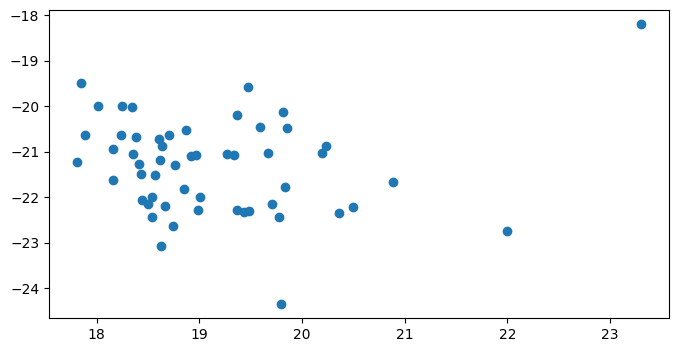

In [14]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(xy[0], xy[1])
plt.savefig('./hw13/9.28a.pdf')

In [15]:
fa2_r = FactorAnalysis(n_components=2)
fa2_r.fit(sport_standard)
fa2_r.components_

array([[ 0.86057622,  0.88042739,  0.81084295,  0.91703551,  0.96835071,
         0.94235634,  0.80393481],
       [-0.38850927, -0.4211868 , -0.42176361, -0.01763201,  0.16350234,
         0.25943917,  0.07038923]])

In [16]:
fa2_r_rot = FactorAnalysis(n_components=2, rotation='varimax')
fa2_r_rot.fit(sport_standard)
fa2_r_rot.components_

array([[ 0.44523379,  0.44104441,  0.38553849,  0.71611304,  0.86722643,
         0.90511653,  0.68013442],
       [-0.83264503, -0.87064949, -0.82868022, -0.57310308, -0.46081931,
        -0.36892848, -0.43437656]])

In [17]:
for i in range(7):
    print(" & "
          .join(
        [str(np.around(fa2_r.components_.T[i][j], 2)) for j in range(2)] +
        [str(np.around(fa2_r.noise_variance_[i], 2))] +
        [str(np.around(fa2_r_rot.components_.T[i][j], 2)) for j in range(2)] +
        [str(np.around(fa2_r_rot.noise_variance_[i], 2))]
    ))

0.86 & -0.39 & 0.09 & 0.45 & -0.83 & 0.09
0.88 & -0.42 & 0.03 & 0.44 & -0.87 & 0.03
0.81 & -0.42 & 0.15 & 0.39 & -0.83 & 0.15
0.92 & -0.02 & 0.14 & 0.72 & -0.57 & 0.14
0.97 & 0.16 & 0.02 & 0.87 & -0.46 & 0.02
0.94 & 0.26 & 0.03 & 0.91 & -0.37 & 0.03
0.8 & 0.07 & 0.33 & 0.68 & -0.43 & 0.33


In [18]:
xyr = (np.linalg.inv(fa2_r.components_ @ np.diag(1/fa2_r.noise_variance_) @ fa2_r.components_.T) @ fa2_r.components_ @ np.diag(1/fa2_r.noise_variance_) @ sport_standard.T).T

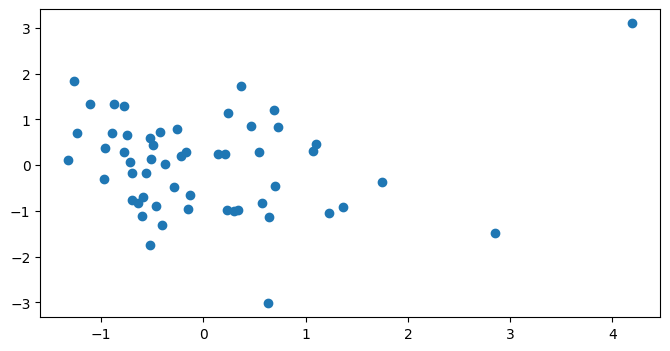

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(xyr[0], xyr[1])
plt.savefig('./hw13/9.28b.pdf')

## 11.7

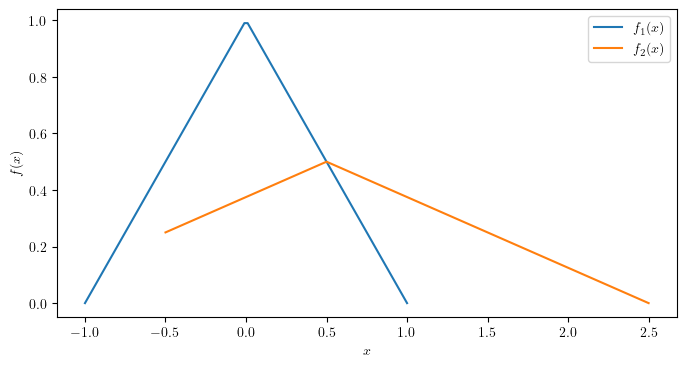

In [20]:
plt.rcParams['text.usetex'] = True

x1 = np.linspace(-1, 1, 100)
y1 = 1 - np.abs(x1)
x2 = np.linspace(-0.5, 2.5, 100)
y2 = 1/4 * (2 - np.abs(x2-0.5))
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x1, y1, label=r'$f_1(x)$')
ax.plot(x2, y2, label=r'$f_2(x)$')
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$f(x)$")
ax.legend()
plt.savefig('./hw13/11.7.pdf')